In [114]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy

In [2]:
insurance=pd.read_csv("insurance.csv")

In [3]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance.shape   # dataframe has 1338 rows and 7 columns

(1338, 7)

In [5]:
insurance.info()   # There are 7 features and are a mix of int,float and object, There is no Null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
insurance.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
insurance=pd.get_dummies(insurance,drop_first=True)

In [12]:
insurance.columns   # New Columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [13]:
print ("Minimum value of each feature {} {}".format('\n',insurance.quantile(q=0)))

Minimum value of each feature 
 age                   18.0000
bmi                   15.9600
children               0.0000
charges             1121.8739
sex_male               0.0000
smoker_yes             0.0000
region_northwest       0.0000
region_southeast       0.0000
region_southwest       0.0000
Name: 0, dtype: float64


In [14]:
print ("Quantile 25% value of each feature {} {}".format('\n',insurance.quantile(q=.25)))

Quantile 25% value of each feature 
 age                   27.00000
bmi                   26.29625
children               0.00000
charges             4740.28715
sex_male               0.00000
smoker_yes             0.00000
region_northwest       0.00000
region_southeast       0.00000
region_southwest       0.00000
Name: 0.25, dtype: float64


In [15]:
print ("median(50%) value of each feature {} {}".format('\n',insurance.quantile(q=.5)))

median(50%) value of each feature 
 age                   39.000
bmi                   30.400
children               1.000
charges             9382.033
sex_male               1.000
smoker_yes             0.000
region_northwest       0.000
region_southeast       0.000
region_southwest       0.000
Name: 0.5, dtype: float64


In [16]:
bmiprint ("median(75%) value of each feature {} {}".format('\n',insurance.quantile(q=.75)))

NameError: name 'bmiprint' is not defined

In [ ]:
IQR_bmi=(insurance['bmi'].quantile(0.75) - insurance['bmi'].quantile(0.25)) # Outliers are (bmi quartile(0.25) - 1.5 IQR) and (bmi quartile(0.75) + 1.5 IQR) 
sns.boxplot(insurance['bmi'],width=0.1)

In [ ]:
IQR_age=(insurance['age'].quantile(0.75) - insurance['age'].quantile(0.25)) # Outliers are (age quartile(0.25) - 1.5 IQR) and (age quartile(0.75) + 1.5 IQR) 
sns.boxplot(insurance['age'],width=0.1)

In [ ]:
IQR_age=(insurance['charges'].quantile(0.75) - insurance['charges'].quantile(0.25)) # Outliers are (charges quartile(0.25) - 1.5 IQR) and (age quartile(0.75) + 1.5 IQR) 
sns.boxplot(insurance['charges'],width=0.1)

In [ ]:
plt.figure(figsize=(9,6))
plt.subplot(221)
sns.distplot(insurance['bmi'])
plt.subplot(222)
sns.distplot(insurance['charges'])
plt.subplot(325)
sns.distplot(insurance['age'])

In [ ]:
print("skwness is {}".format(stats.skew(insurance.age)))
if insurance['age'].mean() > insurance['age'].median():
    print ("age is right skewed ")
else:
    print ("age is left skewed")

In [ ]:
print("skwness is {}".format(stats.skew(insurance.bmi)))
if insurance['bmi'].mean() > insurance['bmi'].median():
    print ("bmi is right skewed ")
else:
    print ("bmi is left skewed")

In [ ]:
print("skwness is {}".format(stats.skew(insurance.charges)))
if insurance['charges'].mean() > insurance['charges'].median():
    print ("Charges is right skewed ")
else:
    print ("Chargs is left skewed")

In [ ]:
insurance_pair=pd.read_csv('insurance.csv')
sns.pairplot(insurance_pair)

In [ ]:
insurance.columns

In [ ]:
plt.figure(figsize=(9,6))
plt.subplot(221)
sns.countplot(insurance_pair['sex'],hue=insurance_pair.children)
plt.subplot(222)
sns.countplot(insurance_pair.region, hue=insurance_pair.children)
plt.subplot(223)
sns.countplot(insurance_pair.smoker, hue=insurance_pair.children)

In [17]:
insurance.sample(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
510,56,32.110,1,11763.00090,1,0,0,0,0
187,30,30.900,3,5325.65100,0,0,0,0,1
264,53,38.060,3,20462.99766,0,0,0,1,0
290,28,33.400,0,3172.01800,0,0,0,0,1
637,35,38.095,2,24915.04626,0,0,0,0,0
423,25,30.590,0,2727.39510,1,0,0,0,0
648,18,28.500,0,1712.22700,1,0,0,0,0
233,59,27.500,1,12333.82800,1,0,0,0,1
1037,45,30.495,1,39725.51805,0,1,1,0,0
705,33,32.900,2,5375.03800,0,0,0,0,1


In [30]:
charges_smokers=insurance[insurance['smoker_yes'] == 1].charges
charges_smokers.shape

(274,)

In [29]:
charges_nonsmokers=insurance[insurance['smoker_yes'] == 0].charges
charges_nonsmokers.shape

(1064,)

Text(0, 0.5, 'count')

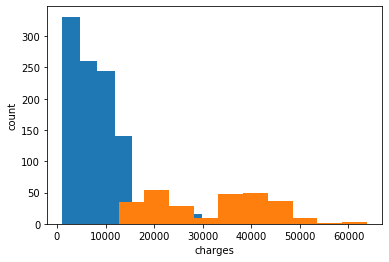

In [62]:
plt.figure()
plt.hist(charges_nonsmokers,bins=10,label='nonsmoker')
plt.hist(charges_smokers,bins=10,label='smoker')
plt.xlabel("charges")
plt.ylabel("count")

In [63]:
t_stats,p_value=stats.ttest_ind(np.array(charges_nonsmokers),np.array(charges_smokers))

In [64]:
if p_value > .05:
    print ("Null value is rejected, it means charges for smokers and non-smokers are not equal")
else:
    print ("Null value is not rejected, it means charges for smokers and non-smokers are equal")

Null value is not rejected, it means charges for smokers and non-smokers are equal


In [66]:
insurance.sample(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
194,18,34.430,0,1137.46970,1,0,0,1,0
875,23,28.120,0,2690.11380,0,0,1,0,0
416,52,34.100,0,9140.95100,1,0,0,1,0
785,35,27.700,3,6414.17800,0,0,0,0,1
531,62,31.730,0,14043.47670,0,0,0,0,0
1329,52,38.600,2,10325.20600,1,0,0,0,1
1047,22,52.580,1,44501.39820,1,1,0,1,0
152,32,37.145,3,6334.34355,0,0,0,0,0
804,23,26.510,0,1815.87590,1,0,0,1,0
1049,49,30.900,0,39727.61400,1,1,0,0,1


Text(0, 0.5, 'count')

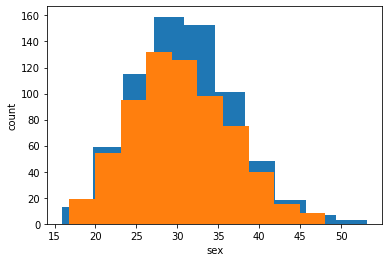

In [67]:
plt.figure()
plt.hist(insurance[insurance['sex_male'] == 1].bmi,bins=10,label='Male')
plt.hist(insurance[insurance['sex_male'] == 0].bmi,bins=10,label='Female')
plt.xlabel("sex")
plt.ylabel("count")

In [75]:
t_stats,p_value=stats.ttest_ind(insurance[insurance['sex_male'] == 1].bmi,insurance[insurance['sex_male'] == 0].bmi)

In [76]:
if p_value > .05 :
    print ("Null value is rejected, it means bmi of males and females are not equal")
else:
    print ("Null value is not rejected, it means bmi of males and females  are equal")

Null value is rejected, it means bmi of males and females are not equal


In [ ]:
Q. 4c Do smokers frequency differs significantly in Male and female?
H0 : Smokers frequency is equal in male and female
Ha : Smokers frequency is not equal in male and female

This is a chi-square test, considerng 95% confidence level hence alpha = 5

In [95]:
malesmoker=insurance[(insurance['sex_male'] == 1) & (insurance['smoker_yes']==1)].shape[0]

In [94]:
female_smoker=insurance[(insurance['sex_male'] == 0) & (insurance['smoker_yes']==1)].shape[0]

In [92]:
index=['Male','Female']

In [96]:
gender_smoke_habit=pd.DataFrame({'Gender' : index, 
                                 "Frequency" : [malesmoker,female_smoker]})

In [101]:
gender_smoke_habit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
Gender       2 non-null object
Frequency    2 non-null int64
dtypes: int64(1), object(1)
memory usage: 112.0+ bytes


In [105]:
gender_smoke_habit

,Gender,Frequency
0,Male,159
1,Female,115


In [106]:
gender_smoke_habit.Frequency

0    159
1    115
Name: Frequency, dtype: int64

In [110]:
crosstab = pd.crosstab(insurance['sex_male'],insurance['smoker_yes'])  

chi_value, p_value, dof, expected =  stats.chi2_contingency(crosstab)

In [111]:
chi_value

7.39291081459996

In [112]:
if p_value < 0.05:  # Setting our significance level at 5%
    print("Null value is not rejected, Smokers frequency is equal in male and female")
else:
    print("Null value is rejected, Smokers frequency is not equal in male and female")

Null value is not rejected, Smokers frequency is equal in male and female


In [116]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance[insurance['sex_male'] == 0])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
